<a href="https://colab.research.google.com/github/MarkNgendo/Hypothesis-Testing_using-Bluecars/blob/main/Moringa_School_W4_IP_05_07_Mark_Ngendo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Purpose of Analysis

I am presently a curious data scientist who seeks to investigate the most popular postal code covered by Autolib Car rental services and I am particularly interested in the BlueCar product. In the following analysis, I shall examine whether there's an inherent shortage over the weekend caused by people taking more cars than they return. The parameter of interest is the mean number of cars in:


*   BlueCars taken
*   BlueCars returned.

Null hypothesis: There is no difference between the average number of cars borrowed and those returned during weekends in the most popular postal code.

Alternate Hypothesis: On average more cars are borrowed than returned on weekends in the most popular postal code

significance level used: 5%


The data being used can be found in the following links:



*   [Dataset](http://bit.ly/DSCoreAutolibDataset)
*   [Description of columns](http://bit.ly/DSCoreAutolibDatasetGlossary)



## Importing the libraries and loading the data.

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [163]:
autolib = pd.read_csv('autolib_daily_events_postal_code.csv')
description = pd.read_excel('columns_explanation.xlsx')


In [164]:
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [165]:
description

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


## General Data Cleaning


In [166]:
autolib.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [167]:
autolib.duplicated().sum()

0

In [168]:
#dropping unnecessary columns that have nothing to do with Bluecars

blue = autolib.iloc[:, :7]
blue.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117


In [169]:
blue.dtypes

Postal code               int64
date                     object
n_daily_data_points       int64
dayOfWeek                 int64
day_type                 object
BlueCars_taken_sum        int64
BlueCars_returned_sum     int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


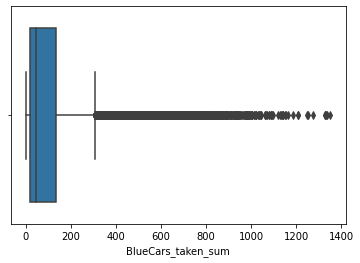

In [170]:
# Checking for outliers
sns.boxplot(blue['BlueCars_taken_sum'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


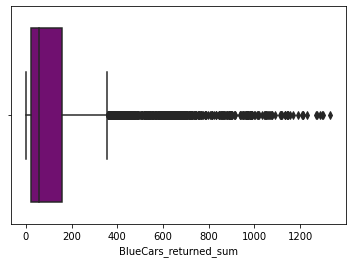

In [171]:
sns.boxplot(blue[blue['day_type']=='weekend']['BlueCars_returned_sum'], color='Purple')
plt.show()

The outliers are integral to the data and cannot be removed without compromising the information being presented here. They simply show the extremes of borrowing/returning vehicles throughout the weeks.

## Univariate analysis

In [172]:
pip install pandas

In [173]:
pip install pandas-profiling==2.12.0

In [174]:
from pandas_profiling import ProfileReport
pf = ProfileReport(blue)

pf.to_file(output_file='Output.html')


Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [175]:
pf

# Bivariate Analysis

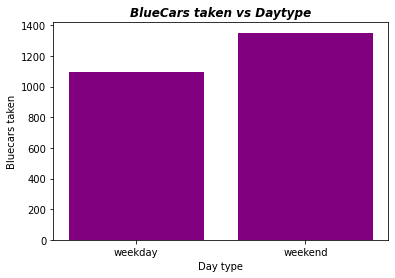

In [176]:
plt.bar(blue['day_type'], blue['BlueCars_taken_sum'], color='purple')
plt.xlabel('Day type')
plt.ylabel('Bluecars taken')
plt.title('BlueCars taken vs Daytype', fontweight='bold', style='italic')
plt.show()

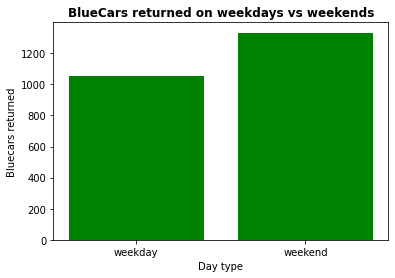

In [177]:
plt.bar(blue['day_type'], blue['BlueCars_returned_sum'], color='green')
plt.xlabel('Day type')
plt.ylabel('Bluecars returned')
plt.title('BlueCars returned on weekdays vs weekends', fontweight='bold')
plt.show()

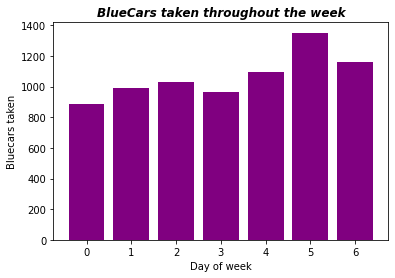

In [178]:
plt.bar(blue['dayOfWeek'], blue['BlueCars_taken_sum'], color='purple')
plt.xlabel('Day of week')
plt.ylabel('Bluecars taken')
plt.title('BlueCars taken throughout the week', fontweight='bold', style='italic')
plt.show()

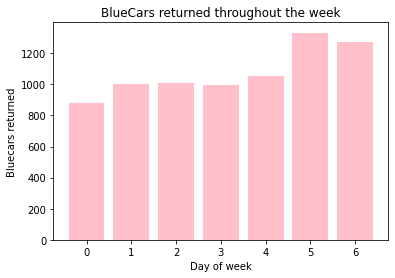

In [179]:
plt.bar(blue['dayOfWeek'], blue['BlueCars_returned_sum'], color='pink')
plt.xlabel('Day of week')
plt.ylabel('Bluecars returned')
plt.title('BlueCars returned throughout the week')
plt.show()

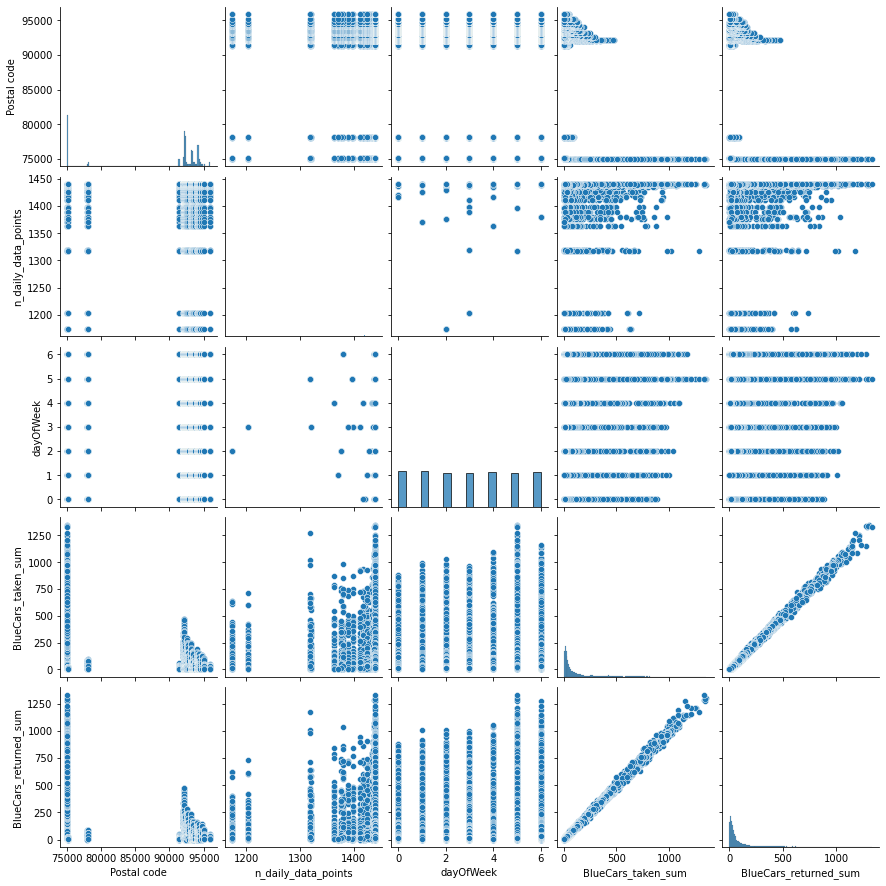

In [180]:
# Plotting some pairplots
sns.pairplot(blue)
plt.show()

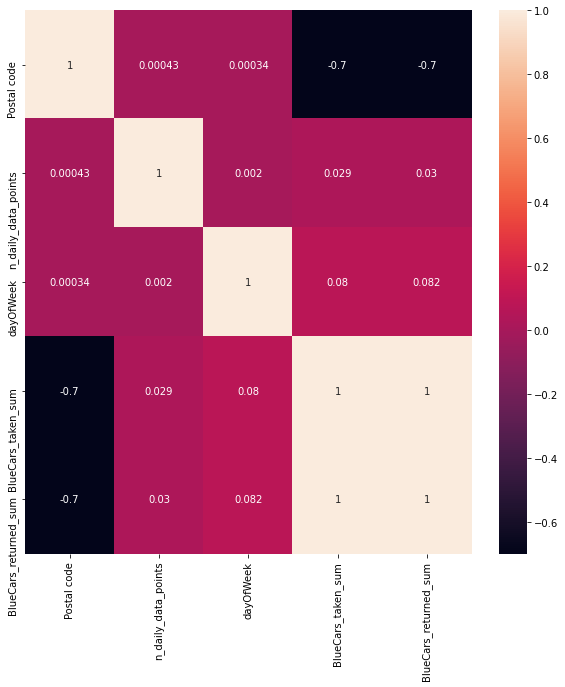

In [181]:
# Plotting the heat map to investigate the relationships between the columns

plt.figure(figsize=(10,10))
sns.heatmap(blue.corr(), annot=True)
plt.show()

In [182]:
# Table of correlation between the columns
blue.corr()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum
Postal code,1.000000,0.000432,0.000343,-0.698020,-0.697519
n_daily_data_points,0.000432,1.000000,0.002039,0.029411,0.030063
dayOfWeek,0.000343,0.002039,1.000000,0.079649,0.081954
BlueCars_taken_sum,-0.698020,0.029411,0.079649,1.000000,0.998660
BlueCars_returned_sum,-0.697519,0.030063,0.081954,0.998660,1.000000


**Findings**


BlueCars are  mainly returned on Weekends even though there is still quite a high number of them being returned throughout the week. At the same time, they are also borrowed the most on Saturdays particularly.
There also seems to be a strong correlation between cars taken and those returned.

# Solution Implementation.

In [183]:
# Identifying the most popular postal code.

blue.groupby(blue['Postal code'])[['BlueCars_taken_sum']].sum().sort_values(by='BlueCars_taken_sum', ascending=False).head()

,BlueCars_taken_sum
Postal code,
75015,139925
75016,123287
75017,114581
75013,84489
75019,81973


The following table shows that Postal Code 75015 has the highest number of cars borrowed. It therefore forms our population from which a sample using Simple Random Sampling can be used seeing as there are no clusters no strata from this.

In [184]:
# Creating a dataframe called Popular for the most popular postal code that has entries only from weekends

popular= blue[(blue['Postal code']==75015) | (blue['day_type']=='weekend')]
popular.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
5,75001,1/6/2018,1437,5,weekend,187,185
6,75001,1/7/2018,1440,6,weekend,180,180
12,75001,1/13/2018,1440,5,weekend,224,223
13,75001,1/14/2018,1440,6,weekend,193,193
19,75001,1/20/2018,1439,5,weekend,217,217


In [185]:
# Checking whether the data is normally distributed using a Normality test

In [186]:
from scipy.stats import anderson

result = anderson(popular['BlueCars_taken_sum'].values)
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal' % (sl, cv))

15.000: 0.576, data does not look normal
10.000: 0.655, data does not look normal
5.000: 0.786, data does not look normal
2.500: 0.917, data does not look normal
1.000: 1.091, data does not look normal


In [187]:
# chcking for normality in the returned cars

result = anderson(popular['BlueCars_returned_sum'].values)

for m in range(len(result.critical_values)):

  sl, cv = result.significance_level[i], result.critical_values[i]

  if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f, data looks normal' % (sl,cv))
  else:
    print("%.3f: %.3f, data does not look normal" % (sl, cv))

1.000: 1.091, data does not look normal
1.000: 1.091, data does not look normal
1.000: 1.091, data does not look normal
1.000: 1.091, data does not look normal
1.000: 1.091, data does not look normal


In [188]:
# Neither of the two populations are normally distributed so it would be best to use Maximum Likelihod Estimation
# to fit them into normal distributions. Therefore, an assumption of this analysis will be that the data is normally distributed


In [189]:
# Extracting the necessary information from the dataframe

taken = popular['BlueCars_taken_sum'].values
returned = popular['BlueCars_returned_sum'].values

# Checking POpulation sizes
print('Taken size: ', taken.sum())
print('Returned size: ', returned.sum())

Taken size:  778823
Returned size:  782601


 The sample size is calculated using an online statistical tool found [here](http://www.raosoft.com/samplesize.html)

### Point Estimation

In [209]:
np.random.seed(10)

sample_taken = np.random.choice(a=taken, size=384, replace=False)
print(sample_taken.mean())

# Probability of rejecting the null hypothesis when it's false:

from statsmodels.stats.power import zt_ind_solve_power
power = zt_ind_solve_power(effect_size=0.5, ratio=1.0, alpha=0.05, power=None, nobs1=384)
print("Power of the test: ", power)
print("\nSample_taken mean: ", sample_taken.mean())

# difference between population mean?
taken.mean() - sample_taken.mean()

178.1796875
Power of the test:  0.9999996621821322

Sample_taken mean:  178.1796875


-10.79885792768107

In [206]:
np.random.seed(10)
sample_returned = np.random.choice(a=returned, size=384, replace=False)

# Power of the sample size.

from statsmodels.stats.power import zt_ind_solve_power
power = zt_ind_solve_power(effect_size=0.5, ratio=1.0, alpha=0.05, power=None, nobs1=384)
print("Power of the test: ", power)
print("\nSample_returned mean: ", sample_returned.mean())

# Difference from the population mean?

print("\nReturned mean - Sample mean: ",returned.mean() - sample_returned.mean())

Power of the test:  0.9999996621821322

Sample_returned mean:  178.48697916666666

Returned mean - Sample mean:  -10.294200314313343


### Confidence interval for the difference of means

In [192]:
import statsmodels.stats.api as sms

cm = sms.CompareMeans(sms.DescrStatsW(taken), sms.DescrStatsW(returned))

cm.tconfint_diff(usevar='pooled', alpha=.95)

(-1.1256132769515264, -0.49828528311724063)

### Hypothesis test

Since this data scientist is interested to see whether the two means vary enough to indicate a significant difference between the two means, and a ttest cannot be used, the only option left is to pass the x-parameter as the mean of the returned sample.

In [193]:
import scipy.stats as stats


# Calculating the zscore
zscore = (sample_returned.mean() - taken.mean())/ taken.std()
zscore

0.04621744672905032

In [194]:
from scipy.stats import norm

pvalue = norm.cdf(zscore)

if pvalue < 0.95:
  print("We fail to reject the null hypothesis with a pvalue of: ", pvalue)

else:
  print("We reject the null hypothesis with a pvalue of: ", pvalue)

We fail to reject the null hypothesis with a pvalue of:  0.5184315315727906


## Conclusions

Conclusion, from a statistical standpoint, there isn't enough evidence to suggest that the mean number of cars borrowed is greater than the average number of cars returned on weekends in Postal Code 75015.